In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

/Users/bhaskarn/.virtualenvs/env_datascience/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/bhaskarn/.virtualenvs/env_datascience/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/bhaskarn/.virtualenvs/env_datascience/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

#### import fashion_mnist dataset from keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#### undrstand the data

In [3]:
## read first train datum
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

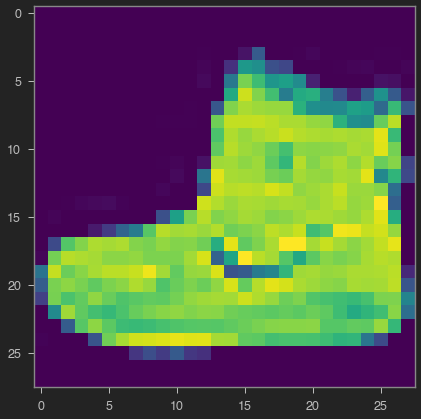

In [4]:
## let's view the first image
plt.imshow(X_train_full[0]) 

In [5]:
## as per train data, let's see what this means
y_train_full[0]

9

In [6]:
#### Class names are not include with dataset , so let's save them for
#### for our understanding purpose.

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names[y_train_full[0]]

'Ankle boot'

In [9]:
## each image is of 28x28 pixels (arranged in 2D-array)
## each pixel intensity varies between 0 and 255; 0 = black, 255 = white
## therefor normalizing these values will help gradiesnt descent

#### Data Normalization

In [10]:
## easiest way is to divide dataset by 255 (since we know highest is 255)
X_train_n = X_train_full/255.0
X_test_n = X_test/255.0

#### Split data

In [11]:
#### 5000 for validation
#### 55k for train
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
#### changing names as per convention  
X_test = X_test_n

In [12]:
## see scaled values
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Create the model architecture

##### 1. Sequential APIs of Keras

In [13]:
np.random.seed(123)
tf.random.set_seed(123)

In [14]:
nn_seq = tf.keras.models.Sequential()
nn_seq.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
nn_seq.add(tf.keras.layers.Dense(300, activation='relu'))
nn_seq.add(tf.keras.layers.Dense(100, activation='relu'))
nn_seq.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
nn_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


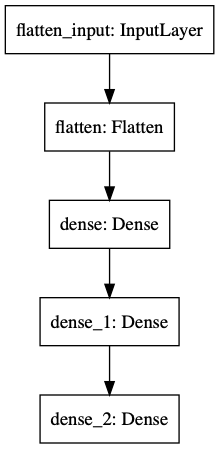

In [16]:
# See the model structure
import pydot
tf.keras.utils.plot_model(nn_seq)

In [17]:
weights, biases = nn_seq.layers[1].get_weights()
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

In [19]:
## Complie the model
nn_seq.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
model_history = nn_seq.fit(X_train, y_train, epochs=30,
                          validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7261 - accuracy: 0.7619 - val_loss: 0.5307 - val_accuracy: 0.8182
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4905 - accuracy: 0.8285 - val_loss: 0.5275 - val_accuracy: 0.8050
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8442 - val_loss: 0.4209 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8549 - val_loss: 0.4016 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8608 - val_loss: 0.3850 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8669 - val_loss: 0.3816 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3660 - accuracy: 0.8700 - val_loss: 0.3716 - val_accuracy:

In [21]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [22]:
model_history.history

{'loss': [0.7261010408401489,
  0.490543395280838,
  0.4435742497444153,
  0.41463619470596313,
  0.394863098859787,
  0.37895581126213074,
  0.3660070300102234,
  0.35346537828445435,
  0.343301922082901,
  0.33360177278518677,
  0.326323926448822,
  0.3180670738220215,
  0.30991411209106445,
  0.30292564630508423,
  0.2973577678203583,
  0.29056549072265625,
  0.2855646014213562,
  0.28077980875968933,
  0.2743510901927948,
  0.26959285140037537,
  0.2639915347099304,
  0.25956639647483826,
  0.2553064525127411,
  0.2517111897468567,
  0.24681207537651062,
  0.2431524097919464,
  0.237454354763031,
  0.23384535312652588,
  0.23026373982429504,
  0.22605949640274048],
 'accuracy': [0.7619454264640808,
  0.8285272717475891,
  0.8441818356513977,
  0.8549273014068604,
  0.8607817888259888,
  0.8668909072875977,
  0.8700363636016846,
  0.8739818334579468,
  0.8776545524597168,
  0.8808727264404297,
  0.8831454515457153,
  0.8863999843597412,
  0.8879272937774658,
  0.8908363580703735,
  

In [23]:
import pandas as pd

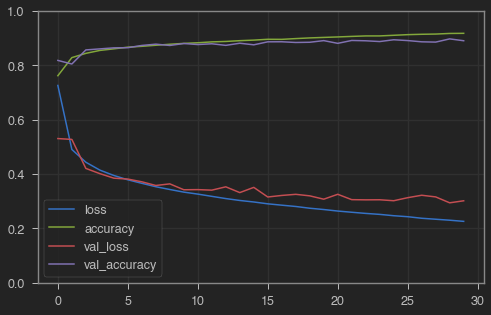

In [24]:
dfp = pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Evaluate performance and predicting using Keras

In [25]:
nn_seq.evaluate(X_test, y_test)
## 1st value is loss and second is accuracy
## since we chose them as test metricsS

313/313 [==============================] - 0s 812us/step - loss: 0.3336 - accuracy: 0.8801


[0.33357304334640503, 0.8801000118255615]

In [26]:
X_new = X_test[:3]
y_proba = nn_seq.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = nn_seq.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

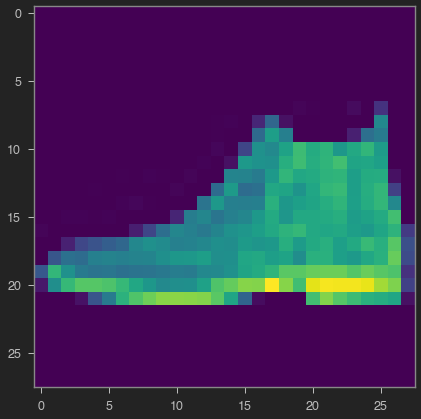

In [29]:
plt.imshow(X_test[0])

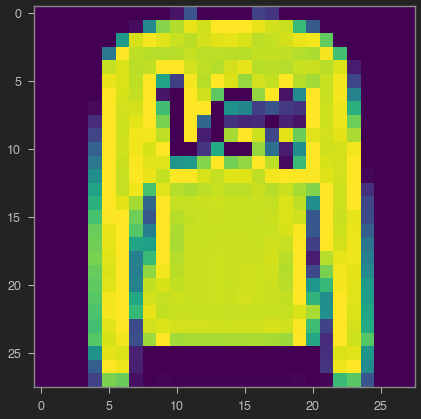

In [30]:
plt.imshow(X_test[1])

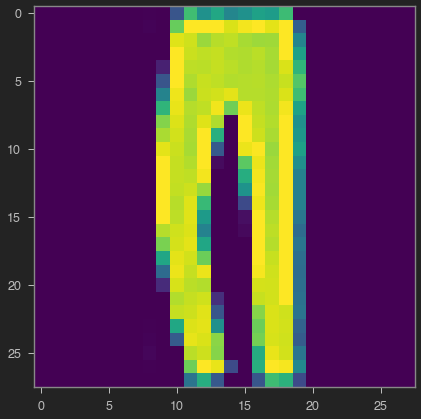

In [31]:
plt.imshow(X_test[2])